In [434]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.api import OLS
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score

# Data Loading

In [435]:
data=pd.read_csv("completion_rate.csv")

# Exploratory Data Analysis (EDA)

In [436]:
data.head()

,form_id,views,submissions,feat_01,feat_02,feat_03,feat_04,feat_05,feat_06,feat_07,...,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47
0,1113027,33,27,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0
1,1115313,147,111,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1115907,528,136,0.0,1.0,0.0,0.0,1.0,0.0,6.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,30.0
3,1116299,55,21,0.0,2.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0
4,1120373,62,54,0.0,0.0,0.0,0.0,1.0,0.0,4.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,11.0,7.0,21.0


In [437]:
data.shape

(1031284, 50)

In [438]:
#to check how many uniquevalues for the form_id
res=data.form_id.unique()
res.shape

(1031284,)

In [439]:
#to check the columns and their data types
data.info()
#data has only float and integer values
#no variable has missing/null value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031284 entries, 0 to 1031283
Data columns (total 50 columns):
form_id        1031284 non-null int64
views          1031284 non-null int64
submissions    1031284 non-null int64
feat_01        1031284 non-null float64
feat_02        1031284 non-null float64
feat_03        1031284 non-null float64
feat_04        1031284 non-null float64
feat_05        1031284 non-null float64
feat_06        1031284 non-null float64
feat_07        1031284 non-null float64
feat_08        1031284 non-null float64
feat_09        1031284 non-null float64
feat_10        1031284 non-null float64
feat_11        1031284 non-null float64
feat_12        1031284 non-null float64
feat_13        1031284 non-null float64
feat_14        1031284 non-null float64
feat_15        1031284 non-null float64
feat_16        1031284 non-null float64
feat_17        1031284 non-null float64
feat_18        1031284 non-null float64
feat_19        1031284 non-null float64
feat_20      

In [440]:
#to have a look at summary statics
data.describe()

,form_id,views,submissions,feat_01,feat_02,feat_03,feat_04,feat_05,feat_06,feat_07,...,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47
count,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,...,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06
mean,7.987444e+06,9.395541e+02,3.224132e+02,1.954515e-01,3.749122e-01,5.497322e-02,1.024936e-03,1.449494e-01,1.769047e-01,8.513950e-01,...,2.399572e-01,5.879176e-02,1.948299e-01,1.551163e-01,2.771681e-01,3.399791e-01,4.803430e-02,8.318746e-01,6.470032e-01,4.468738e+00
std,3.965056e+06,2.674871e+04,8.507656e+03,3.965481e-01,9.334260e-01,4.403415e-01,3.307117e-02,4.802633e-01,9.472932e-01,1.883366e+00,...,1.266072e+00,4.198431e-01,1.173311e+00,7.668222e-01,5.640830e-01,6.157581e-01,2.834470e-01,4.302039e+00,6.045358e+00,1.085162e+01
min,2.255130e+05,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.849671e+06,3.600000e+01,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.887946e+06,7.900000e+01,3.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.149435e+07,2.260000e+02,9.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
max,1.350100e+07,1.226718e+07,6.754385e+06,1.000000e+00,5.500000e+01,7.800000e+01,5.000000e+00,8.700000e+01,9.600000e+01,1.240000e+02,...,1.050000e+02,4.600000e+01,1.000000e+02,1.350000e+02,8.700000e+01,8.700000e+01,8.700000e+01,5.900000e+02,2.065000e+03,1.145000e+03


In [450]:
# Remove unnecessary columns
X=data.drop(['form_id','views','submissions'],axis=1)
y=(data.submissions.values/data.views.values)

In [451]:
#scaling/standarizing column to 0 mean and unit variance
for col in X.columns:
    X[col]=scale(X[col])

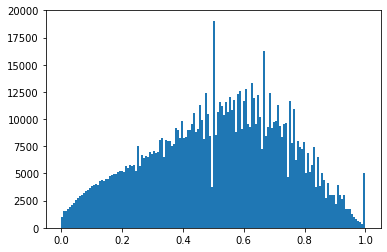

In [453]:
#plot the distribuion of the output variable ---- nice its reasonably normal
plt.hist(y,bins='auto')
plt.show()

In [454]:
X['rate']=(data.submissions/data.views)
corr=X[X.columns[1:]].corr()['rate'][:]
X=X.drop(['rate'],axis=1)

# check co-relation of the dependent variable with independent variables

In [455]:
#check the corelation with target variable --- there is no as such dependency of the output variables on input variables
corr.sort_values()

feat_09   -0.141763
feat_08   -0.128421
feat_15   -0.086753
feat_22   -0.078760
feat_12   -0.062982
feat_02   -0.051653
feat_41   -0.050977
feat_13   -0.045840
feat_20   -0.044292
feat_23   -0.042421
feat_17   -0.042169
feat_21   -0.039179
feat_16   -0.035643
feat_24   -0.031593
feat_10   -0.030097
feat_44   -0.019576
feat_04   -0.017856
feat_03   -0.017150
feat_11   -0.015264
feat_26   -0.015238
feat_35   -0.010626
feat_25   -0.010153
feat_32   -0.009801
feat_45   -0.009185
feat_39   -0.007664
feat_46   -0.004895
feat_18   -0.004162
feat_31   -0.003477
feat_42   -0.002956
feat_28   -0.000595
feat_43    0.001833
feat_05    0.003097
feat_14    0.003141
feat_29    0.003776
feat_47    0.029068
feat_37    0.032786
feat_27    0.035493
feat_30    0.036161
feat_07    0.038192
feat_40    0.051195
feat_36    0.051386
feat_38    0.051420
feat_34    0.060819
feat_06    0.060819
feat_19    0.061773
feat_33    0.083345
rate       1.000000
Name: rate, dtype: float64

# Identify highly co-related features

In [456]:
# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#print(upper)
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print("Highly corelated variable ",to_drop)
# Drop features 
#X.drop(to_drop, axis=1, inplace=True)

['feat_34', 'feat_38']


# Outlier Detection and Removal

In [457]:
from scipy import stats
z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
#remove outlier records from data
# X = X[filtered_entries]
# y = y[filtered_entries]

In [458]:
print(X.shape)
print(y.shape)

(1031284, 47)
(1031284,)


# ML Modeling

In [459]:
# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(X, y,test_size=0.20,random_state=0)

# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((825027, 47), (206257, 47), (825027,), (206257,))

# Linear regression

In [460]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)

    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('R2: ', round(r2_score(y_true, y_pred),4))

In [462]:
# create an object of the LinearRegression Model
model_LR = LinearRegression()

# fit the model with the training data
model_LR.fit(train_x, train_y)

# predict the target on train and test data 
predict_train_LR = model_LR.predict(train_x)
predict_test_LR  = model_LR.predict(test_x)

# Analysing Linear Regression Results

In [463]:
regression_results(test_y,predict_test_LR)
#very poor results as expected --- only 6% of the variation is explaind by the given features

MAE:  0.178
MSE:  0.0469
RMSE:  0.2165
R2:  0.0652


# RandomForest Regression 

In [464]:
# create an object of the RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(train_x, train_y)

# predict the target on train and test data
predict_train_RFR = model_RFR.predict(train_x)
predict_test_RFR = model_RFR.predict(test_x)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Analysing RandomForest Regression Results

In [465]:
regression_results(test_y,predict_test_RFR)

MAE:  0.1729
MSE:  0.0445
RMSE:  0.2111
R2:  0.1116


# Feature Selection - top 10 to check how much accuracy falls

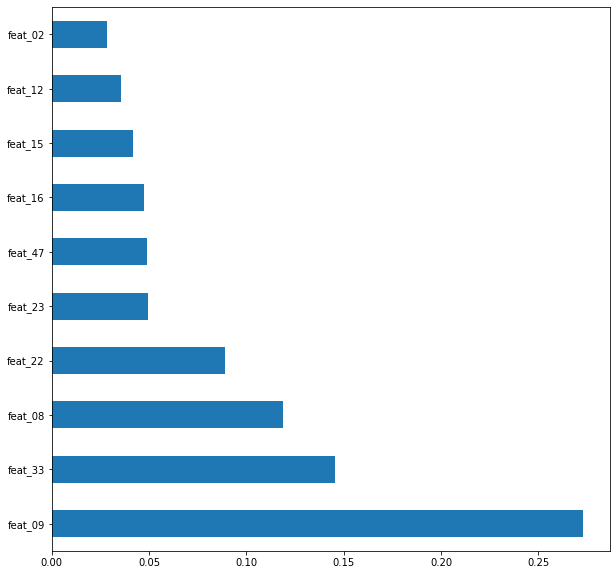

In [466]:
# plot the 10 most important features 
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model_RFR.feature_importances_, index = train_x.columns)
feat_importances.nlargest(10).plot(kind='barh');

# Evaluating results after feature selection

In [469]:
train_x_new=train_x[['feat_09','feat_33','feat_08','feat_22','feat_23','feat_47','feat_16','feat_02','feat_41','feat_45']]
test_x_new=test_x[['feat_09','feat_33','feat_08','feat_22','feat_23','feat_47','feat_16','feat_02','feat_41','feat_45']]

In [470]:
# fit the model with the training data
model_RFR.fit(train_x_new, train_y)

# predict the target on train and test data 
predict_train_RFR_new = model_RFR.predict(train_x_new)
predict_test_RFR_new  = model_RFR.predict(test_x_new)

In [471]:
regression_results(test_y,predict_test_RFR_new)
#there is fall of 1% in the value of R square 

MAE:  0.1739
MSE:  0.045
RMSE:  0.2122
R2:  0.1022


# To compare regression results - top 10 samples in test data

In [472]:
test_y[0:10]

array([0.66666667, 0.32795699, 0.7       , 0.61978022, 0.37037037,
       0.15942029, 0.57581967, 0.18705036, 0.58035714, 0.44565217])

In [473]:
predict_test_RFR_new[0:10]

array([0.42276547, 0.54561534, 0.57044182, 0.45576585, 0.54561534,
       0.38683768, 0.52920523, 0.41145765, 0.4482848 , 0.57044182])

# Lets try with deep learning model --- to get some new features 

In [475]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping

In [476]:
model = Sequential()
model.add(Dense(100, input_dim=47, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

In [477]:
model.fit(train_x, train_y,
                epochs=10,
                batch_size=256,
                validation_data=(test_x, test_y),
                callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
#again there is no improvement ---- conclusion these features are not representative to predict the form fill ratio

Train on 825027 samples, validate on 206257 samples
Epoch 1/10
825027/825027 [==============================] - 21s 25us/step - loss: 0.0443 - acc: 0.0040 - val_loss: 0.0440 - val_acc: 0.0043
Epoch 2/10
825027/825027 [==============================] - 19s 23us/step - loss: 0.0436 - acc: 0.0041 - val_loss: 0.0438 - val_acc: 0.0042
Epoch 3/10
825027/825027 [==============================] - 20s 24us/step - loss: 0.0435 - acc: 0.0041 - val_loss: 0.0437 - val_acc: 0.0041
Epoch 4/10
825027/825027 [==============================] - 19s 23us/step - loss: 0.0433 - acc: 0.0041 - val_loss: 0.0436 - val_acc: 0.0042
Epoch 5/10
825027/825027 [==============================] - 19s 23us/step - loss: 0.0432 - acc: 0.0041 - val_loss: 0.0436 - val_acc: 0.0042
Epoch 6/10
825027/825027 [==============================] - 19s 23us/step - loss: 0.0431 - acc: 0.0041 - val_loss: 0.0435 - val_acc: 0.0042
Epoch 7/10
825027/825027 [==============================] - 19s 23us/step - loss: 0.0430 - acc: 0.0041 - val